# Home #3.3

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
# read data
rets_mkt = pd.read_excel('data/hw_3_3_data.xlsx', sheet_name='benchmark rets')
rets_spx = pd.read_excel('data/hw_3_3_data.xlsx', sheet_name="s&p500 rets")

## 1. Penalized Regression

In [3]:
X = rets_spx.drop(columns='date')
y = rets_mkt.GLD

### 1) OLS

In [4]:
model_ols = LinearRegression().fit(X, y)
results_ols = pd.DataFrame({'regressor': X.columns, 'intercept': model_ols.intercept_, 'beta': model_ols.coef_})

a) intercept and betas

In [5]:
display(results_ols)

,regressor,intercept,beta
0,A,0.000613,0.065328
1,AAP,0.000613,-0.030014
2,AAPL,0.000613,-0.089143
3,ABC,0.000613,-0.042302
4,ABT,0.000613,0.075277
5,ACN,0.000613,-0.022478
6,ADBE,0.000613,-0.041769
7,ADI,0.000613,0.025656
8,ADM,0.000613,-0.006127
9,ADP,0.000613,0.086004


b) R-squared

In [6]:
model_ols.score(X, y)

1.0

c) and d)

In [7]:
def compute_beta_sigma(spx, results):
    results['beta_sigma'] = spx.drop(columns='date').std().values * results.beta.values
    results['abs_beta_sigma'] = results.beta_sigma.abs()
    results['abs_beta'] = results.beta.abs()
    return results 

In [8]:
results_ols = compute_beta_sigma(rets_spx, results_ols)
print("******* Top 10 largest betas *******")
display(results_ols.sort_values('abs_beta', ascending=False).head(10)[['regressor', 'beta']].\
    reset_index(drop=True))
print("******* Top 10 largest beta-sigmas *******")
display(results_ols.sort_values('abs_beta_sigma', ascending=False).head(10)[['regressor', 'beta_sigma']].\
    reset_index(drop=True))

******* Top 10 largest betas *******


,regressor,beta
0,NEM,0.159889
1,XOM,-0.152578
2,PM,0.134020
3,USB,0.132346
4,MSFT,-0.132025
5,BR,0.123529
6,BAX,0.117546
7,DTE,-0.116357
8,TXN,-0.110645
9,APD,-0.106897


******* Top 10 largest beta-sigmas *******


,regressor,beta_sigma
0,NEM,0.007798
1,UAL,-0.006702
2,XOM,-0.005969
3,PHM,0.005466
4,SPG,0.005239
5,COF,-0.005195
6,USB,0.005188
7,DRI,0.005146
8,PM,0.004810
9,SCHW,-0.004725


e) Condition number

In [9]:
condition_number = np.linalg.cond(rets_spx.drop(columns=['date']).values); condition_number

212.25385331307297

The high condition number is indicative of presence of multicollinearity which violates OLS assumption 1.

### 2) Ridge Regression

In [10]:
model_ridge = Ridge(alpha=0.5).fit(X, y)
results_ridge = pd.DataFrame({'regressor': X.columns, 'intercept': model_ridge.intercept_, 'beta': model_ridge.coef_})

a) R-squared

In [11]:
model_ridge.score(X, y)

0.7622443309155418

In [12]:
results_ridge = compute_beta_sigma(rets_spx, results_ridge)
print("******* Top 10 largest betas *******")
display(results_ridge.sort_values('abs_beta', ascending=False).head(10)[['regressor', 'beta']].\
    reset_index(drop=True))
print("******* Top 10 largest beta-sigmas *******")
display(results_ridge.sort_values('abs_beta_sigma', ascending=False).head(10)[['regressor', 'beta_sigma']].\
    reset_index(drop=True))

******* Top 10 largest betas *******


,regressor,beta
0,NEM,0.105331
1,SCHW,-0.034809
2,FCX,0.030162
3,RHI,-0.026028
4,RJF,-0.024630
5,CHTR,0.022171
6,CBRE,-0.020875
7,O,0.020077
8,SLB,0.019675
9,PKG,-0.019215


******* Top 10 largest beta-sigmas *******


,regressor,beta_sigma
0,NEM,0.005137
1,FCX,0.002314
2,ENPH,0.002027
3,SCHW,-0.001656
4,RHI,-0.001149
5,SLB,0.001125
6,RJF,-0.001085
7,CBRE,-0.000970
8,ULTA,-0.000953
9,CHTR,0.000895


### 3) LASSO

In [13]:
model_lasso = Lasso(alpha=2e-5).fit(X, y)
results_lasso = pd.DataFrame({'regressor': X.columns, 'intercept': model_lasso.intercept_, 'beta': model_lasso.coef_})

a) intercept and beta

In [14]:
display(results_lasso)

,regressor,intercept,beta
0,A,0.000031,0.011062
1,AAP,0.000031,-0.001673
2,AAPL,0.000031,-0.000000
3,ABC,0.000031,-0.001622
4,ABT,0.000031,0.000000
5,ACN,0.000031,-0.000000
6,ADBE,0.000031,-0.000000
7,ADI,0.000031,-0.000000
8,ADM,0.000031,0.000000
9,ADP,0.000031,-0.000000


b) R-squared

In [15]:
model_lasso.score(X, y)

0.7541466465557551

c) Most influential factors

In [16]:
results_lasso = compute_beta_sigma(rets_spx, results_lasso)
print("******* Top 10 largest betas *******")
display(results_lasso.sort_values('abs_beta', ascending=False).head(10)[['regressor', 'beta']].\
    reset_index(drop=True))
print("******* Top 10 largest beta-sigmas *******")
display(results_lasso.sort_values('abs_beta_sigma', ascending=False).head(10)[['regressor', 'beta_sigma']].\
    reset_index(drop=True))

******* Top 10 largest betas *******


,regressor,beta
0,NEM,0.232283
1,O,0.056246
2,T,-0.055258
3,SCHW,-0.052780
4,RJF,-0.046686
5,IFF,-0.033776
6,LDOS,0.032328
7,SLB,0.031621
8,CBRE,-0.031235
9,RHI,-0.030106


******* Top 10 largest beta-sigmas *******


,regressor,beta_sigma
0,NEM,0.011329
1,SCHW,-0.002511
2,O,0.002376
3,RJF,-0.002057
4,SLB,0.001808
5,ENPH,0.001698
6,T,-0.001688
7,CBRE,-0.001451
8,PHM,0.001391
9,FCX,0.001381


d) Number of regressors with non-zero beta

In [17]:
non_zero_regressors = results_lasso.loc[results_lasso.beta != 0]
print(f"Number of non-zero regressors: {len(non_zero_regressors)}")

Number of non-zero regressors: 75


## 4. Comparaison

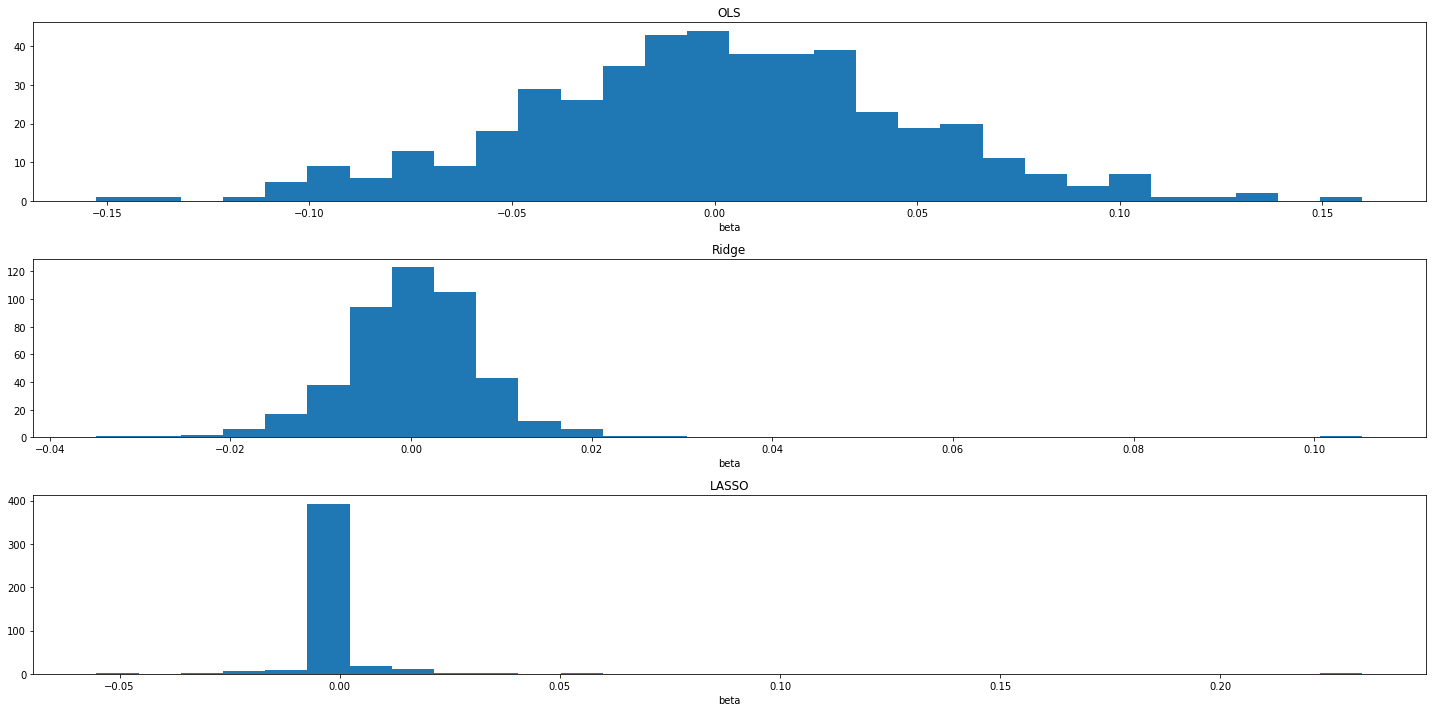

In [18]:
# histogram
fig, axis = plt.subplots(3, 1, figsize=(20, 10))
axis[0].hist(results_ols.beta, bins=30)
axis[0].set_xlabel('beta')
axis[0].set_title('OLS')

axis[1].hist(results_ridge.beta, bins=30)
axis[1].set_xlabel('beta')
axis[1].set_title('Ridge')

axis[2].hist(results_lasso.beta, bins=30)
axis[2].set_xlabel('beta')
axis[2].set_title('LASSO')

fig.tight_layout()

a) OLS and Ridge have nonzero betas. LASSO as we saw previously has 75 nonzero regressors.\
All three have both positive and negative values. However, the range in magnitude is larger for OLS and LASSO than it is for Ridge.

b) OLS has the larget R-squared. This is not a surprise because OLS isn't penalized for using all the regressors to perfectly fit the data.


## 5. Cross Validation

In [19]:
# split data into train and test
X_train, y_train = \
    rets_spx.loc[rets_spx.date.dt.year < 2021].drop(columns='date'), rets_mkt.loc[rets_mkt.date.dt.year < 2021].drop(columns='date').GLD
X_test, y_test = \
    rets_spx.loc[rets_spx.date.dt.year >= 2021].drop(columns='date'), rets_mkt.loc[rets_mkt.date.dt.year >= 2021].drop(columns='date').GLD

### LassoCV

In [20]:
model_lasso_cv = LassoCV().fit(X_train, y_train)
model_lasso_cv.alpha_

7.887365550464517e-05

### RidgeCV

In [21]:
model_ridge_cv = RidgeCV().fit(X_train, y_train)
model_ridge_cv.alpha_

0.1

# 6. OOS predictions

In [22]:
score_oos_lasso = model_lasso_cv.score(X_test, y_test)
score_oos_ridge = model_ridge_cv.score(X_test, y_test)
print(f"Lasso OOS R2: {score_oos_lasso:.2f}\nRidge OOS R2: {score_oos_ridge:.2f}")

Lasso OOS R2: 0.51
Ridge OOS R2: 0.32
